<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/MNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing useful packages

import keras
from keras.datasets import mnist
from keras.models import Sequential
from matplotlib import pyplot as plt
  

In [2]:
#load mnist dataset
ds = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#assigning dataset to respectve training and test variables
train_ds, test_ds = ds
type(train_ds)

tuple

In [4]:
#assigning features and target values to the respective variables
train_x, train_y = train_ds
type(train_x)

numpy.ndarray

In [5]:
len(train_x)

60000

In [6]:
test_x, test_y = test_ds

In [7]:
print(train_x[0].shape)

(28, 28)


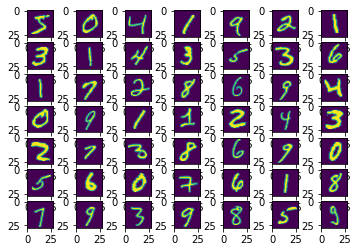

In [8]:
# plot fuction is used to plot the 49 images at a time using subplot function for multiple plots

def plot(x):
  c = 1
  for i in x:
    #fig = plt.figure()
    plt.subplot(7,7,c)
    c = c+1
    plt.imshow(i)
  plt.show()

#assignng first 49 images to variable x
x = train_x[0:49]
plot(x)

In [16]:
print(train_x[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
#Normalize data 
#from the large dataset we took only 1000 rows for training and 100 rows for testing purpose 
#To reduce this computation we can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster.
# As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

train_x = train_x[0:1000]/255
test_x = test_x[0:100]/255
train_y = train_y[0:1000]
test_y = test_y[0:100]
print(test_y)
print(type(test_y[0]))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
<class 'numpy.uint8'>


In [23]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
test_yc = to_categorical(test_y)
train_yc = to_categorical(train_y)
print(test_yc)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [12]:
print(test_yc[0][:])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [13]:
print(test_yc.shape)
print(type(test_yc))

(100, 10)
<class 'numpy.ndarray'>


In [14]:
def model_fun():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(filters=32  ,input_shape=(28,28,1) , kernel_size=(3,3), activation='relu'))
  model.add(keras.layers.pooling.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(16,kernel_size=(3,3), activation='relu'))
  model.add(keras.layers.pooling.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(100,activation='relu', ))
  model.add(keras.layers.Dense(10, activation= keras.activations.softmax))
  model.compile(optimizer='adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])
  return model

model = model_fun()
model.fit(train_x,train_yc, epochs=30)




Epoch 1/30
32/32 [==============================] - 2s 23ms/step - loss: 1.9090 - accuracy: 0.4540
Epoch 2/30
32/32 [==============================] - 1s 22ms/step - loss: 0.7321 - accuracy: 0.7920
Epoch 3/30
32/32 [==============================] - 1s 22ms/step - loss: 0.4342 - accuracy: 0.8750
Epoch 4/30
32/32 [==============================] - 1s 21ms/step - loss: 0.2888 - accuracy: 0.9210
Epoch 5/30
32/32 [==============================] - 1s 22ms/step - loss: 0.2122 - accuracy: 0.9460
Epoch 6/30
32/32 [==============================] - 1s 22ms/step - loss: 0.1655 - accuracy: 0.9540
Epoch 7/30
32/32 [==============================] - 1s 22ms/step - loss: 0.1414 - accuracy: 0.9620
Epoch 8/30
32/32 [==============================] - 1s 23ms/step - loss: 0.1098 - accuracy: 0.9750
Epoch 9/30
32/32 [==============================] - 1s 22ms/step - loss: 0.0935 - accuracy: 0.9770
Epoch 10/30
32/32 [==============================] - 1s 22ms/step - loss: 0.0657 - accuracy: 0.9850
Epoch 11/

In [15]:
model.evaluate(test_x,test_yc)
model.predict(test_x)

4/4 [==============================] - 0s 7ms/step - loss: 0.0516 - accuracy: 0.9800


array([[1.12082737e-14, 5.96221748e-14, 8.20629609e-08, 2.30679078e-07,
        1.65838714e-19, 2.88828683e-10, 1.06839892e-16, 9.99999642e-01,
        7.16228726e-12, 1.21684635e-10],
       [1.16842536e-09, 7.48306149e-07, 9.99998927e-01, 4.13368341e-12,
        6.22300010e-18, 6.19033836e-14, 3.14169114e-07, 8.76816929e-19,
        5.61254732e-12, 2.76729221e-18],
       [1.50448787e-09, 9.99975562e-01, 2.73184412e-07, 5.91991067e-10,
        9.83941482e-06, 4.36320624e-09, 7.09717642e-06, 6.93732045e-06,
        2.66304426e-07, 8.74640023e-08],
       [9.99973297e-01, 2.29100918e-12, 3.03498041e-07, 3.15545819e-11,
        2.18909946e-13, 9.07898482e-07, 4.54691857e-08, 1.04050041e-05,
        7.01397230e-12, 1.50756969e-05],
       [1.18860520e-12, 1.62847860e-11, 2.81788637e-09, 1.06590924e-10,
        9.99527097e-01, 1.84946242e-11, 3.02362935e-09, 1.83400886e-08,
        9.49741262e-13, 4.72975284e-04],
       [3.76463305e-11, 9.99993324e-01, 3.43869786e-08, 1.76319390e-10,
   